<a href="https://colab.research.google.com/github/Mya-mori/Daisuke-/blob/master/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
train_x.shape

(891, 13)

In [0]:
test.shape

(418, 11)

In [0]:
train_y = train["Survived"]
train_x = train.drop(["Survived"], axis = 1)
train_x.shape

(891, 11)

In [0]:
train_y.shape

(891,)

In [0]:
X_data = pd.concat([train_x, test])
X_data.shape

(1309, 11)

In [0]:
train_x["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
train_x.shape[1]

11

In [0]:
from sklearn.preprocessing import LabelEncoder

for i in range(train_x.shape[1]):
  if train_x.iloc[:, i].dtype == object:
    lbl = LabelEncoder()
    lbl.fit(list(train_x.iloc[:, i].values))
    train_x.iloc[:, i] = lbl.transform(list(train_x.iloc[:, i].values))

for i in range(test.shape[1]):
  if test.iloc[:, i].dtype == object:
    lbl = LabelEncoder()
    lbl.fit(list(test.iloc[:, i].values))
    test.iloc[:, i] = lbl.transform(list(test.iloc[:, i].values))


train_x["Embarked"].unique()

array([2, 0, 1, 3])

In [0]:
train_x.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,3,108,1,22.0,1,0,523,7.2500,147,2,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,2


In [0]:
train_nan = train_x.isnull().sum()
train_nan = train_nan[train_nan >0]
train_nan

Series([], dtype: int64)

In [0]:
train_x["Age"] = train_x["Age"].fillna(train_x["Age"].median())
train_x["Family"] = train_x["SibSp"] + train_x["Parch"] +1
train_x = train_x.drop(["SibSp", "Parch", "Name"], axis = 1)
train_x

KeyError: ignored

In [0]:
test_nan = test.isnull().sum()
test_nan = test_nan[test_nan > 0]
test_nan

Series([], dtype: int64)

In [0]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test["Family"] = test["SibSp"] + test["Parch"] +1
test = test.drop(["SibSp", "Parch", "Name"], axis = 1)

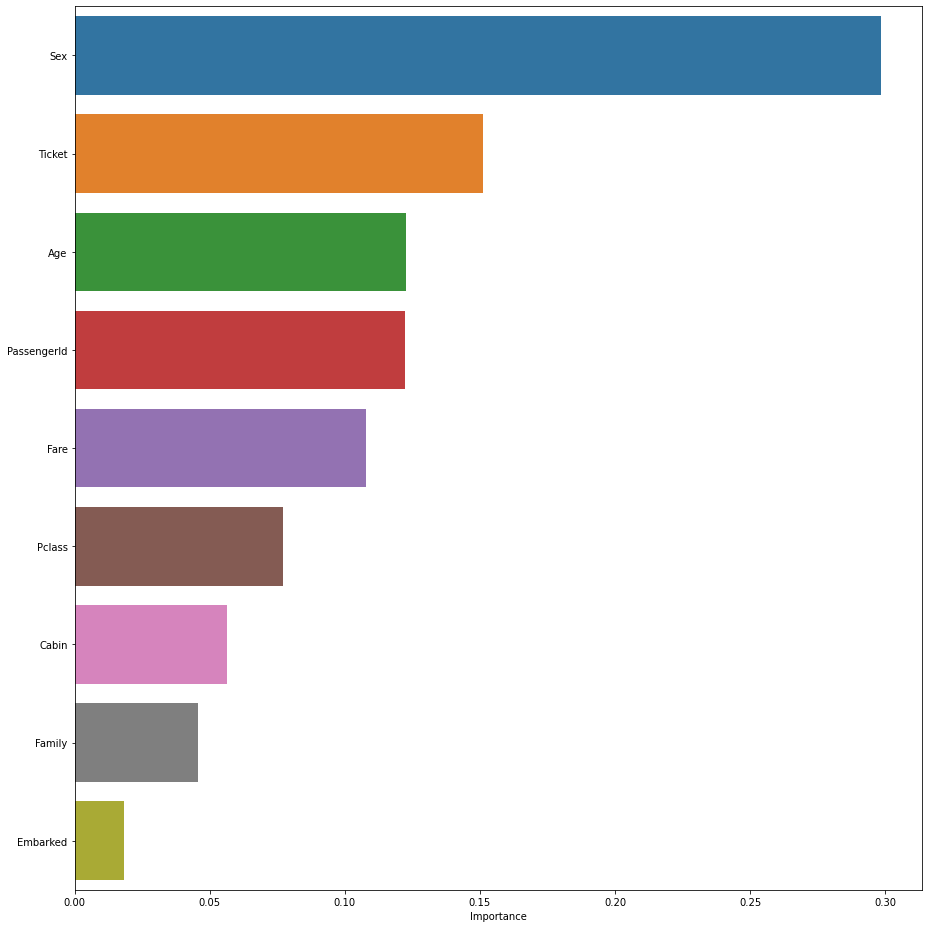

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, max_features = "auto")
rf.fit(train_x, train_y)

ranking = np.argsort(-rf.feature_importances_)
f, ax =plt.subplots(figsize =(13, 13))

sns.barplot(x = rf.feature_importances_[ranking], y = train_x.columns.values[ranking],
            orient = "h")

ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

In [0]:
train_X = train_x.iloc[:, ranking[:5]]
test_X = test.iloc[:, ranking[:5]]

In [0]:
slr = LinearRegression()

slr.fit(train_X, train_y)

print(slr.coef_[0])
print(slr.intercept_)

-0.5097921519439408
0.8201152536726448


In [0]:
y_test_pred = slr.predict(test_X).round(f)

TypeError: ignored

In [0]:
import math
math.ceil(y_test_pred)

TypeError: ignored

In [0]:
result = pd.read_csv("gender_submission.csv")
result.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [0]:
result["Survived"] = y_test_pred

In [0]:
result.head(5)

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [0]:
result.to_csv("challenge", index= False)